In [1]:
#import dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.datasets as dta
import numpy as np 
from datetime import datetime
import random

import folium 

import warnings
warnings.filterwarnings('ignore')

In [2]:
#call in csv file and set up API keys
microplastics_csv = pd.read_csv("Resources/MarinePlastics.csv")
microplastics_csv

FID                    Date  Latitude  Longitude          Oceans  \
0      35217    4/6/2005 12:00:00 AM    2.1900  -135.7300   Pacific Ocean   
1      36142   2/24/2002 12:00:00 AM  -12.6900  -142.3000   Pacific Ocean   
2      35881  10/25/2010 12:00:00 AM   19.6200  -146.5000   Pacific Ocean   
3      36474  11/16/2003 12:00:00 AM   18.9700  -143.4700   Pacific Ocean   
4      34553    3/5/2001 12:00:00 AM   19.3800   -74.0900  Atlantic Ocean   
...      ...                     ...       ...        ...             ...   
11301  37329  11/28/2014 12:00:00 AM   15.5034   -52.4550  Atlantic Ocean   
11302  36788  12/11/2014 12:00:00 AM   15.3929   -57.7041  Atlantic Ocean   
11303  29706   11/7/1995 12:00:00 AM   17.3500   -60.2000  Atlantic Ocean   
11304  32460  10/31/2001 12:00:00 AM   18.6300   -59.6400  Atlantic Ocean   
11305  37870   5/21/2014 12:00:00 AM   18.0327   -63.0973  Atlantic Ocean   

             Regions SubRegions  Measurement       Unit Density Range  ...  \
0                NaN        NaN      0.00000  pieces/m3      0-0.0005  ...   
1                NaN        NaN      0.00000  pieces/m3      0-0.0005  ...   
2                NaN        NaN      0.00216  pieces/m3  0.0005-0.005  ...   
3                NaN        NaN      0.00000  pieces/m3      0-0.0005  ...   
4      Caribbean Sea        NaN      0.00000  pieces/m3      0-0.0005  ...   
...              ...        ...          ...        ...           ...  ...   
11301            NaN        NaN      0.00200  pieces/m3  0.0005-0.005  ...   
11302            NaN        NaN      0.02500  pieces/m3       0.005-1  ...   
11303            NaN        NaN      0.00864  pieces/m3       0.005-1  ...   
11304            NaN        NaN      0.01080  pieces/m3       0.005-1  ...   
11305  Caribbean Sea        NaN      0.00200  pieces/m3  0.0005-0.005  ...   

      Accession Number                                     Accession Link  \
0               211008  https://www.ncei.noaa.gov/access/metadata/land...   
1               211008  https://www.ncei.noaa.gov/access/metadata/land...   
2               211008  https://www.ncei.noaa.gov/access/metadata/land...   
3               211008  https://www.ncei.noaa.gov/access/metadata/land...   
4               211007  https://www.ncei.noaa.gov/access/metadata/land...   
...                ...                                                ...   
11301           211009  https://www.ncei.noaa.gov/access/metadata/land...   
11302           211009  https://www.ncei.noaa.gov/access/metadata/land...   
11303           211007  https://www.ncei.noaa.gov/access/metadata/land...   
11304           211007  https://www.ncei.noaa.gov/access/metadata/land...   
11305           211009  https://www.ncei.noaa.gov/access/metadata/land...   

                                   GlobalID         CreationDate  \
0      6d278226-565e-4ed0-b46a-e1cabb32ecc0  3/9/2023 9:05:33 PM   
1      6fb35a58-21b6-4cce-9dbb-f9c222bc311d  3/9/2023 9:05:33 PM   
2      67f360ab-017e-4a86-931b-6f7336c2c206  3/9/2023 9:05:33 PM   
3      5be50d3b-7343-45f0-ac71-19a3cdc047ea  3/9/2023 9:05:33 PM   
4      5e54fac6-640b-4445-8fff-94a9498d6168  3/9/2023 9:05:33 PM   
...                                     ...                  ...   
11301  6084e526-1912-4ee3-95ae-de0f245d6ac8  3/9/2023 9:05:33 PM   
11302  40034069-71ef-4b88-b504-6aa74d855dd3  3/9/2023 9:05:33 PM   
11303  791c578c-b672-4e4b-a885-0c3fdce11f8d  3/9/2023 9:05:33 PM   
11304  46335627-8df0-400e-bef8-7ff0afed6798  3/9/2023 9:05:33 PM   
11305  09ce8156-fffb-4b19-b200-efc0d319d0a6  3/9/2023 9:05:33 PM   

             Creator             EditDate         Editor  \
0      ncei_cds_noaa  3/9/2023 9:05:33 PM  ncei_cds_noaa   
1      ncei_cds_noaa  3/9/2023 9:05:33 PM  ncei_cds_noaa   
2      ncei_cds_noaa  3/9/2023 9:05:33 PM  ncei_cds_noaa   
3      ncei_cds_noaa  3/9/2023 9:05:33 PM  ncei_cds_noaa   
4      ncei_cds_noaa  3/9/2023 9:05:33 PM  ncei_cds_noaa   
...              ...                  ...    

In [3]:
#taking columns we need + Adding Regions and Sampling Method - Latitude,Longitude (Alishon)
clean_microplastics = microplastics_csv[["Date", "Latitude", "Longitude", "Oceans","Regions","Measurement","Unit","Sampling Method"]]
clean_microplastics.head()

Date  Latitude  Longitude          Oceans        Regions  \
0    4/6/2005 12:00:00 AM      2.19    -135.73   Pacific Ocean            NaN   
1   2/24/2002 12:00:00 AM    -12.69    -142.30   Pacific Ocean            NaN   
2  10/25/2010 12:00:00 AM     19.62    -146.50   Pacific Ocean            NaN   
3  11/16/2003 12:00:00 AM     18.97    -143.47   Pacific Ocean            NaN   
4    3/5/2001 12:00:00 AM     19.38     -74.09  Atlantic Ocean  Caribbean Sea   

   Measurement       Unit Sampling Method  
0      0.00000  pieces/m3     Neuston net  
1      0.00000  pieces/m3     Neuston net  
2      0.00216  pieces/m3     Neuston net  
3      0.00000  pieces/m3     Neuston net  
4      0.00000  pieces/m3     Neuston net

In [4]:
clean_microplastics["Year"] = pd.Series()
clean_microplastics.head()

Date  Latitude  Longitude          Oceans        Regions  \
0    4/6/2005 12:00:00 AM      2.19    -135.73   Pacific Ocean            NaN   
1   2/24/2002 12:00:00 AM    -12.69    -142.30   Pacific Ocean            NaN   
2  10/25/2010 12:00:00 AM     19.62    -146.50   Pacific Ocean            NaN   
3  11/16/2003 12:00:00 AM     18.97    -143.47   Pacific Ocean            NaN   
4    3/5/2001 12:00:00 AM     19.38     -74.09  Atlantic Ocean  Caribbean Sea   

   Measurement       Unit Sampling Method  Year  
0      0.00000  pieces/m3     Neuston net   NaN  
1      0.00000  pieces/m3     Neuston net   NaN  
2      0.00216  pieces/m3     Neuston net   NaN  
3      0.00000  pieces/m3     Neuston net   NaN  
4      0.00000  pieces/m3     Neuston net   NaN

In [5]:
#cleaning time column
for i in range(len(clean_microplastics["Date"])):
    date_time = clean_microplastics.loc[i,"Date"]
    date = date_time.split(" ")[0]
    clean_microplastics.loc[i,"Date"]=date
clean_microplastics.head()

Date  Latitude  Longitude          Oceans        Regions  \
0    4/6/2005      2.19    -135.73   Pacific Ocean            NaN   
1   2/24/2002    -12.69    -142.30   Pacific Ocean            NaN   
2  10/25/2010     19.62    -146.50   Pacific Ocean            NaN   
3  11/16/2003     18.97    -143.47   Pacific Ocean            NaN   
4    3/5/2001     19.38     -74.09  Atlantic Ocean  Caribbean Sea   

   Measurement       Unit Sampling Method  Year  
0      0.00000  pieces/m3     Neuston net   NaN  
1      0.00000  pieces/m3     Neuston net   NaN  
2      0.00216  pieces/m3     Neuston net   NaN  
3      0.00000  pieces/m3     Neuston net   NaN  
4      0.00000  pieces/m3     Neuston net   NaN

In [6]:
#taking columns we need + Adding Regions and Sampling Method - Latitude,Longitude (Alishon)
# clean_microplastics = microplastics_csv[["Date","Oceans","Regions","Measurement","Unit","Sampling Method"]]
# # clean_microplastics["Year"] = pd.Series()
# clean_microplastics

# df = pd.DataFrame({'date': ['2022-01-01', '2022-02-01', '2022-03-01'],
#                    'value': [10, 20, 30]})
# clean_microplastics["Date"] = pd.to_datetime(clean_microplastics["Date"])  # Convert string dates to datetime objects

# Add a new column 'year' with the year of each date
# clean_microplastics["Year"] = clean_microplastics["Date"].dt.year

# print(clean_microplastics.head())

In [40]:
for x in range(len(clean_microplastics["Year"])):
    year_time = clean_microplastics.loc[x,"Date"]
    year = year_time.split("/")[2]
    clean_microplastics.loc[x,"Year"]=year
clean_microplastics

Date  Latitude  Longitude          Oceans        Regions  \
0        4/6/2005    2.1900  -135.7300   Pacific Ocean            NaN   
1       2/24/2002  -12.6900  -142.3000   Pacific Ocean            NaN   
2      10/25/2010   19.6200  -146.5000   Pacific Ocean            NaN   
3      11/16/2003   18.9700  -143.4700   Pacific Ocean            NaN   
4        3/5/2001   19.3800   -74.0900  Atlantic Ocean  Caribbean Sea   
...           ...       ...        ...             ...            ...   
11301  11/28/2014   15.5034   -52.4550  Atlantic Ocean            NaN   
11302  12/11/2014   15.3929   -57.7041  Atlantic Ocean            NaN   
11303   11/7/1995   17.3500   -60.2000  Atlantic Ocean            NaN   
11304  10/31/2001   18.6300   -59.6400  Atlantic Ocean            NaN   
11305   5/21/2014   18.0327   -63.0973  Atlantic Ocean  Caribbean Sea   

       Measurement       Unit Sampling Method  Year  
0          0.00000  pieces/m3     Neuston net  2005  
1          0.00000  pieces/m3     Neuston net  2002  
2          0.00216  pieces/m3     Neuston net  2010  
3          0.00000  pieces/m3     Neuston net  2003  
4          0.00000  pieces/m3     Neuston net  2001  
...            ...        ...             ...   ...  
11301      0.00200  pieces/m3     Grab sample  2014  
11302      0.02500  pieces/m3     Grab sample  2014  
11303      0.00864  pieces/m3     Neuston net  1995  
11304      0.01080  pieces/m3     Neuston net  2001  
11305      0.00200  pieces/m3     Grab sample  2014  

[11306 rows x 9 columns]

In [8]:
sampling_mean = clean_microplastics.groupby(["Sampling Method"]).mean()["Measurement"]
sampling_median = clean_microplastics.groupby(["Sampling Method"]).median()["Measurement"]
sampling_max = clean_microplastics.groupby(["Sampling Method"]).max()["Measurement"]
sampling_min = clean_microplastics.groupby(["Sampling Method"]).min()["Measurement"]

sampling_statistics = pd.DataFrame ({
    "Mean Measurement per Sampling": sampling_mean,
    "Median Measurement per Sampling": sampling_median,
    "Max Measurement per Sampling": sampling_max,
    "Min Measurement per Sampling": sampling_min})

sampling_statistics.head()

Mean Measurement per Sampling  \
Sampling Method                                  
Aluminum bucket                    2089.859649   
Grab sample                           0.012880   
Intake seawater                      26.730769   
Manta net                             2.887066   
Neuston net                           0.082112   

                 Median Measurement per Sampling  \
Sampling Method                                    
Aluminum bucket                      1710.000000   
Grab sample                             0.005000   
Intake seawater                        27.000000   
Manta net                               1.083789   
Neuston net                             0.002160   

                 Max Measurement per Sampling  Min Measurement per Sampling  
Sampling Method                                                              
Aluminum bucket                   7650.333333                         703.0  
Grab sample                          0.323000                           0.0  
Intake seawater                     63.000000                           0.0  
Manta net                           51.078200                           0.0  
Neuston net                         49.267784                           0.0

In [9]:
# Calculate mean measurement per Ocean
measurement_per_ocean = clean_microplastics.groupby("Oceans")["Measurement"].mean()

# Ocean Statistics
oceans_mean = clean_microplastics.groupby(["Oceans"]).mean()["Measurement"]
oceans_median = clean_microplastics.groupby(["Oceans"]).median()["Measurement"]
oceans_max = clean_microplastics.groupby(["Oceans"]).max()["Measurement"]
oceans_min = clean_microplastics.groupby(["Oceans"]).min()["Measurement"]

oceans_statistics = pd.DataFrame ({
    "Mean Measurement per Oceans": oceans_mean,
    "Median Measurement per Oceans": oceans_median,
    "Max Measurement per Oceans": oceans_max,
    "Min Measurement per Oceans": oceans_min})

oceans_statistics

Mean Measurement per Oceans  Median Measurement per Oceans  \
Oceans                                                                       
Arctic Ocean                       0.030578                        0.01750   
Atlantic Ocean                    16.550686                        0.00432   
Pacific Ocean                      0.900321                        0.00300   

                Max Measurement per Oceans  Min Measurement per Oceans  
Oceans                                                                  
Arctic Ocean                      0.104674                         0.0  
Atlantic Ocean                 7650.333333                         0.0  
Pacific Ocean                    51.078200                         0.0

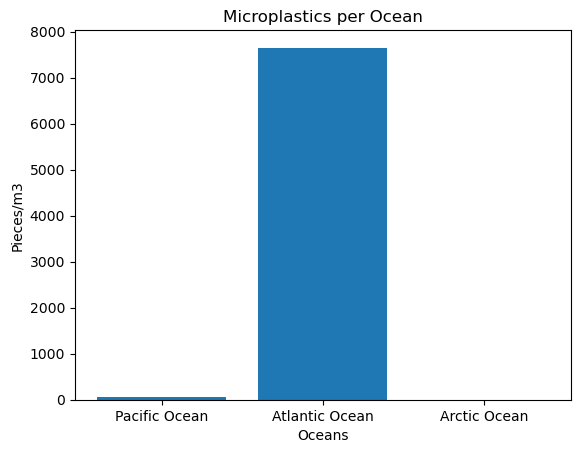

In [10]:
# Create Barplot
plt.bar(clean_microplastics["Oceans"], clean_microplastics["Measurement"])
plt.title("Microplastics per Ocean")
plt.xlabel("Oceans")
plt.ylabel("Pieces/m3")
plt.show()

In [73]:
# Filter only Pacific Ocean

pacific_df = clean_microplastics[(clean_microplastics["Oceans"] == "Pacific Ocean")]

# Pacific Statistics
pacific_mean = pacific_df.groupby(["Year"]).mean()["Measurement"]
pacific_median = pacific_df.groupby(["Year"]).median()["Measurement"]
pacific_max = pacific_df.groupby(["Year"]).max()["Measurement"]
pacific_min = pacific_df.groupby(["Year"]).min()["Measurement"]

pacific_statistics = pd.DataFrame ({
    "Mean Measurement Pacific Ocean": pacific_mean,
    "Median Measurement Pacific Ocean": pacific_median,
    "Max Measurement Pacific Ocean": pacific_max,
    "Min Measurement Pacific Ocean": pacific_min})

pacific_statistics

Mean Measurement Pacific Ocean  Median Measurement Pacific Ocean  \
Year                                                                     
1972                        0.016419                          0.003000   
1973                        0.022286                          0.002000   
1987                        0.014000                          0.000000   
1999                        0.010800                          0.013000   
2000                        0.026167                          0.025500   
2001                        0.002437                          0.000000   
2002                        0.008121                          0.000000   
2003                        0.009513                          0.000000   
2004                        0.057162                          0.000000   
2005                        0.075480                          0.000000   
2006                        0.063743                          0.000000   
2007                        0.170010                          0.000000   
2008                        0.305768                          0.000000   
2009                        1.480874                          0.016196   
2010                        0.182764                          0.000000   
2011                        0.118180                          0.000000   
2012                        0.557139                          0.008280   
2013                        0.016250                          0.010500   
2014                        0.013611                          0.007000   
2015                        2.602248                          1.332952   
2016                        0.005681                          0.001000   
2017                        0.685315                          0.504576   
2018                        5.994575                          2.236627   
2019                        3.693332                          0.607613   

      Max Measurement Pacific Ocean  Min Measurement Pacific Ocean  
Year                                                                
1972                       0.117000                          0.000  
1973                       0.221000                          0.000  
1987                       0.087000                          0.000  
1999                       0.019000                          0.000  
2000                       0.044000                          0.005  
2001                       0.046280                          0.000  
2002                       0.355140                          0.000  
2003                       0.194436                          0.000  
2004                       2.712124                          0.000  
2005                       2.712124                          0.000  
2006                       2.712124                          0.000  
2007                       5.922603                          0.000  
2008                       8.134071                          0.000  
2009                      32.765000                          0.000  
2010                       4.551000                          0.000  
2011                       2.712124                          0.000  
2012                      49.267784                          0.000  
2013                       0.071000                          0.001  
2014                       0.132000                          0.000  
2015                      32.997170                          0.000  
2016                       0.158413                          0.000  
2017                       9.855289                          0.000  
2018                      27.418707                          0.000  
2019                      51.078200                          0.000

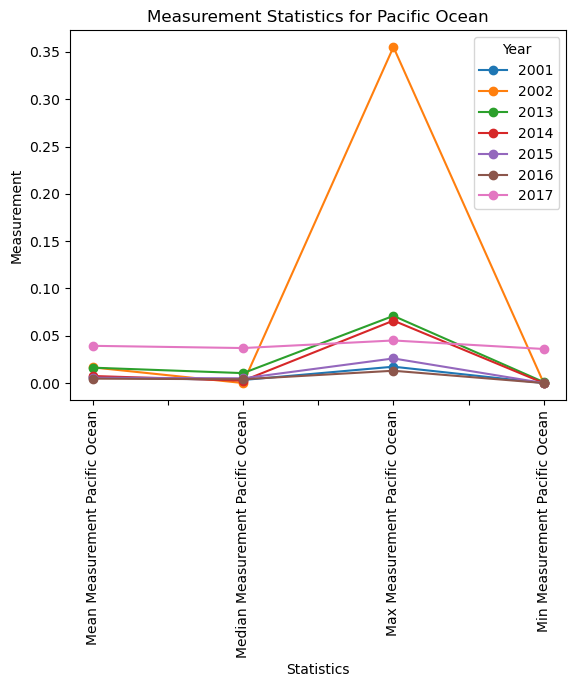

In [12]:
# Transpose the pacific_statistics DataFrame
pacific_stats_transposed = pacific_statistics.transpose()

# Create a line plot with multiple lines
pacific_stats_transposed.plot(kind="line", marker="o")

In [13]:
pacific_map = folium.Map(location=[pacific_df["Latitude"].mean(), pacific_df["Longitude"].mean()], zoom_start=10)

# Add a marker for each point in the DataFrame
for index, row in pacific_df.iterrows():
    folium.Marker([row["Latitude"], row["Longitude"]]).add_to(pacific_map)

# Display the map
pacific_map

In [75]:
# per region
# Calculate mean measurement per region
measurement_per_regions = clean_microplastics.dropna().groupby("Regions")["Measurement"].mean()

# Regions Statistics
regions_mean = clean_microplastics.groupby(["Regions"]).mean()["Measurement"]
regions_median = clean_microplastics.groupby(["Regions"]).median()["Measurement"]
regions_max = clean_microplastics.groupby(["Regions"]).max()["Measurement"]
regions_min = clean_microplastics.groupby(["Regions"]).min()["Measurement"]

regions_statistics = pd.DataFrame ({
    "Mean Measument per Region": regions_mean,
    "Median Measument per Region": regions_median,
    "Max Measument per Region": regions_max,
    "Min Measument per Region": regions_min})

regions_statistics

Mean Measument per Region  \
Regions                                                                         
Bering Sea                                                           0.030250   
Caribbean Sea                                                        0.005581   
Channel Islands National Marine Sanctuary                            0.000667   
Coastal Waters of Florida                                            0.006187   
Coastal Waters of Southeast Alaska and British ...                   0.004370   
Davis Strait                                                         0.032271   
Florida Keys National Marine Sanctuary                               0.004014   
Greater Farallones National Marine Sanctuary                         0.000500   
Gulf of Alaska                                                       0.009686   
Gulf of California                                                   0.004489   
Gulf of Mexico                                                       0.010097   
Gulf of St. Lawrence                                                 0.034191   
Hawaiian Islands Humpback Whale National Marine...                   0.006000   
Hudson Strait                                                        0.007000   
Labrador Sea                                                         0.059011   
Monterey Bay National Marine Sanctuary                               0.000818   
New York Bight                                                       0.009450   
Northwestern Passages                                                0.044000   
Olympic Coast National Marine Sanctuary                              0.001038   
Papahanaumokuakea Marine National Monument                           0.093613   
Stellwagen Bank National Marine Sanctuary                            0.007149   

                                                    Median Measument per Region  \
Regions                                                                           
Bering Sea                                                             0.036500   
Caribbean Sea                                                          0.000000   
Channel Islands National Marine Sanctuary                              0.000000   
Coastal Waters of Florida                                              0.003000   
Coastal Waters of Southeast Alaska and British ...                     0.002000   
Davis Strait                                                           0.017500   
Florida Keys National Marine Sanctuary                                 0.000000   
Greater Farallones National Marine Sanctuary                           0.000500   
Gulf of Alaska                                                         0.006000   
Gulf of California                                                     0.002080   
Gulf of Mexico                                                         0.000000   
Gulf of St. Lawrence                                                   0.002000   
Hawaiian Islands Humpback Whale National Marine...                     0.006000   
Hudson Strait                                                          0.007000   
Labrador Sea                                                           0.059011   
Monterey Bay National Marine Sanctuary                                 0.001000   
New York Bight                                                         0.002000   
Northwestern Passages                                                  0.044000   
Olympic Coast National Marine Sanctuary                                0.001038   
Papahanaumokuakea Marine National Monument                             0.046088   
Stellwagen Bank National Marine Sanctuary                              0.000000   

                                                    Max Measument per Region  \
Regions                                                                        
Bering Sea                                                          0.045000   
Caribbean Sea                         

In [77]:
# Filter sampling method "Aluminum bucket" to not show in data
mask = clean_microplastics["Sampling Method"] != "Aluminum bucket"
filtered_df = clean_microplastics[mask]

# Sort years in in ascending order
sorted_df = filtered_df.sort_values(by="Year")
print(sorted_df)

# Create a DataFrame for each ocean in the data
atlantic_df = sorted_df[(sorted_df["Oceans"] == "Atlantic Ocean")]
pacific_df = sorted_df[(sorted_df["Oceans"] == "Pacific Ocean")]
arctic_df = sorted_df[(sorted_df["Oceans"] == "Arctic Ocean")]

# Calculate average of each ocean to then compare with only California's Seas
atlantic_mean = atlantic_df.groupby(["Year"]).mean()["Measurement"]
pacific_mean = pacific_df.groupby(["Year"]).mean()["Measurement"]
arctic_mean = arctic_df.groupby(["Year"]).mean()["Measurement"]

             Date   Latitude   Longitude          Oceans  \
3730    10/7/1972  27.000000 -135.000000   Pacific Ocean   
5664   10/20/1972  39.083000 -145.000000   Pacific Ocean   
11280  10/23/1972  39.000000 -135.000000   Pacific Ocean   
6889   10/23/1972  38.983000 -133.017000   Pacific Ocean   
6888   11/12/1972  35.617000 -127.883000   Pacific Ocean   
...           ...        ...         ...             ...   
6745     3/3/2021  12.567333  -61.431333  Atlantic Ocean   
8680    7/10/2021  62.472000  -50.423167    Arctic Ocean   
7302    6/26/2021  53.974833  -41.657500  Atlantic Ocean   
2590    5/27/2021  28.615167  -72.519500  Atlantic Ocean   
2749    7/11/2021  47.253000  -70.285167  Atlantic Ocean   

                    Regions  Measurement       Unit Sampling Method  Year  
3730                    NaN     0.020000  pieces/m3     Neuston net  1972  
5664                    NaN     0.020000  pieces/m3     Neuston net  1972  
11280                   NaN     0.060000  pieces/m3

In [78]:
# Select data based on Coordinates of California seas, to then calculate mean for CA
california_df = sorted_df[(sorted_df["Latitude"] >= 32.5) & (sorted_df["Latitude"] <= 42) & (sorted_df["Longitude"] <= -117.5) & (sorted_df["Longitude"] >= -124)]
print(california_df)

# California Average
california_mean = california_df.groupby(["Year"]).mean()["Measurement"]

             Date  Latitude  Longitude         Oceans  \
1156    8/19/2002   37.3000  -122.5800  Pacific Ocean   
8130    8/18/2002   37.6400  -122.5400  Pacific Ocean   
5897   10/18/2002   32.6000  -119.5700  Pacific Ocean   
4026     8/9/2002   38.5300  -123.6600  Pacific Ocean   
1695   10/17/2002   32.9900  -118.7400  Pacific Ocean   
10094   8/20/2002   35.2500  -122.2400  Pacific Ocean   
307     8/21/2002   33.9700  -119.3900  Pacific Ocean   
8505   10/17/2002   32.9100  -118.4800  Pacific Ocean   
3037    8/20/2002   36.1900  -122.1400  Pacific Ocean   
6434     8/2/2009   32.5597  -118.1644  Pacific Ocean   
51      10/4/2014   37.7000  -122.1911  Pacific Ocean   
20      9/14/2014   33.4228  -117.6241  Pacific Ocean   
679    12/19/2014   36.6581  -121.8247  Pacific Ocean   
413    12/27/2014   36.5472  -121.9303  Pacific Ocean   
2094    9/24/2014   33.1155  -122.5120  Pacific Ocean   
5480    2/23/2014   38.1533  -122.8895  Pacific Ocean   
7909   12/21/2014   36.9550  -1

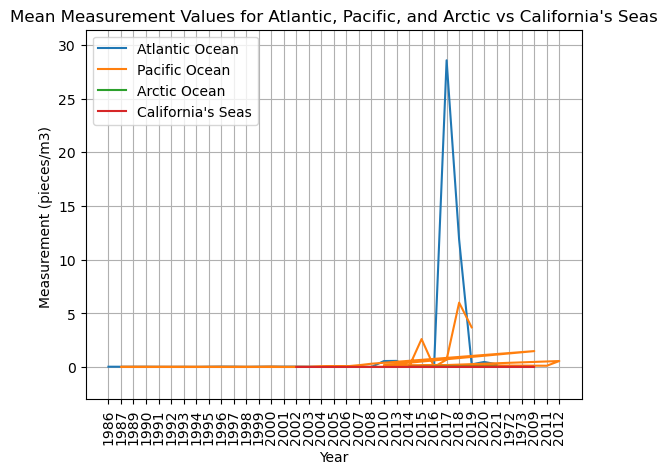

In [92]:
# Create a linear plot to compare California's Seas with the rest of the Oceans

plt.plot(atlantic_mean.index, atlantic_mean.values, label="Atlantic Ocean")
plt.plot(pacific_mean.index, pacific_mean.values, label="Pacific Ocean")
plt.plot(arctic_mean.index, arctic_mean.values, label="Arctic Ocean")
plt.plot(california_mean.index, california_mean.values, label="California's Seas")

# Add axis labels and title
plt.xlabel("Year")
plt.ylabel("Measurement (pieces/m3) ")
plt.title("Mean Measurement Values for Atlantic, Pacific, and Arctic vs California's Seas")
plt.xticks(rotation=90)
plt.ylim(bottom=-3, top=max(atlantic_mean.max(), pacific_mean.max(), arctic_mean.max(), california_mean.max())*1.1)
plt.grid()

# Add legend
plt.legend()

# Show the plot
plt.show()


Text(0.5, 1.0, 'Mean Microplastics Measurement by Region')

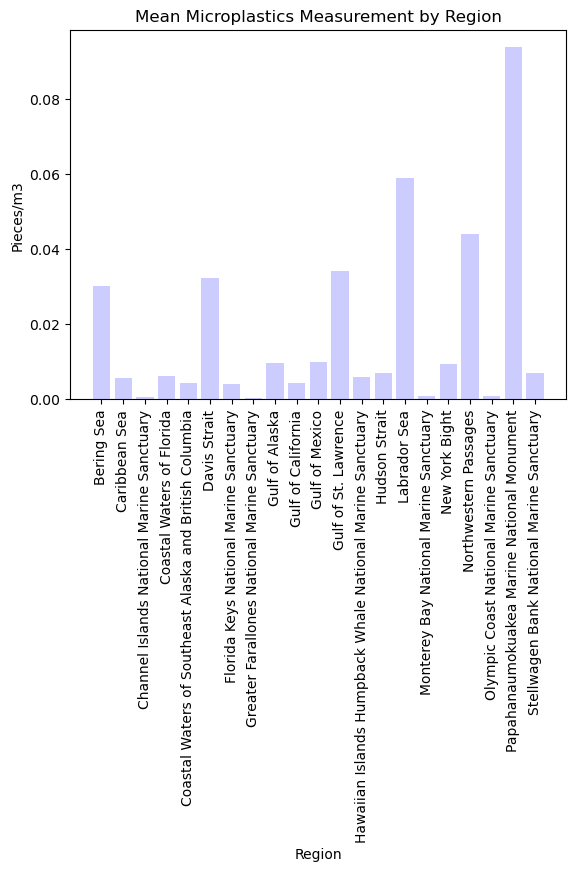

In [16]:
# Create Barplot
plt.bar(measurement_per_regions.index, measurement_per_regions.values, color='blue', alpha=0.2)

# set axis labels and title
plt.xlabel('Region')
plt.ylabel('Pieces/m3')
plt.xticks(rotation="vertical")
plt.title('Mean Microplastics Measurement by Region')

In [17]:
# Year Statistics
year_mean = clean_microplastics.groupby(["Year"]).mean()["Measurement"]
year_median = clean_microplastics.groupby(["Year"]).median()["Measurement"]
year_max = clean_microplastics.groupby(["Year"]).max()["Measurement"]
year_min = clean_microplastics.groupby(["Year"]).min()["Measurement"]

year_statistics = pd.DataFrame ({
    "Mean Measument per Year": year_mean,
    "Median Measument per Year": year_median,
    "Max Measument per Year": year_max,
    "Min Measument per Year": year_min})

year_statistics

Mean Measument per Year  Median Measument per Year  \
Year                                                       
1972                 0.016419                   0.003000   
1973                 0.022286                   0.002000   
1986                 0.027291                   0.000000   
1987                 0.023399                   0.004320   
1989                 0.024941                   0.004320   
1990                 0.025754                   0.006480   
1991                 0.019063                   0.004320   
1992                 0.017570                   0.004320   
1993                 0.020521                   0.002160   
1994                 0.011186                   0.002160   
1995                 0.027987                   0.007198   
1996                 0.040504                   0.006480   
1997                 0.034572                   0.004322   
1998                 0.015101                   0.002160   
1999                 0.030964                   0.006480   
2000                 0.040148                   0.004320   
2001                 0.027397                   0.002450   
2002                 0.023270                   0.000000   
2003                 0.018416                   0.000000   
2004                 0.034517                   0.000000   
2005                 0.058323                   0.002160   
2006                 0.037614                   0.001800   
2007                 0.087723                   0.002160   
2008                 0.198839                   0.000000   
2009                 1.480874                   0.016196   
2010                 0.257169                   0.004320   
2011                 0.118180                   0.000000   
2012                 0.557139                   0.008280   
2013                 0.527473                   0.274584   
2014                 0.029137                   0.007000   
2015                 2.156787                   0.856521   
2016                 0.007617                   0.001000   
2017                 4.545020                   0.520000   
2018               914.368015                  27.418707   
2019                 3.259998                   0.492551   
2020                 0.471655                   0.239806   
2021                 0.223839                   0.030817   

      Max Measument per Year  Min Measument per Year  
Year                                                  
1972                0.117000                     0.0  
1973                0.221000                     0.0  
1986                0.177776                     0.0  
1987                0.820736                     0.0  
1989                0.535636                     0.0  
1990                0.794816                     0.0  
1991                0.356372                     0.0  
1992                0.280776                     0.0  
1993                0.449244                     0.0  
1994                0.239740                     0.0  
1995                0.995680                     0.0  
1996                1.045376                     0.0  
1997                2.308856                     0.0  
1998                0.332612                     0.0  
1999                0.610152                     0.0  
2000                2.237580                     0.0  
2001                0.696544                     0.0  
2002                2.170628                     0.0  
2003                1.125268                     0.0  
2004                2.712124                     0.0  
2005                2.712124                     0.0  
2006                2.712124                     0.0  
2007                5.922603                     0.0  
2008                8.134071                     0.0  
2009               32.765000                     0.0  
2010                7.014418                     0.0  
2011                2.712124                     0.0  
2012               49.267784                     0.0  
2013           

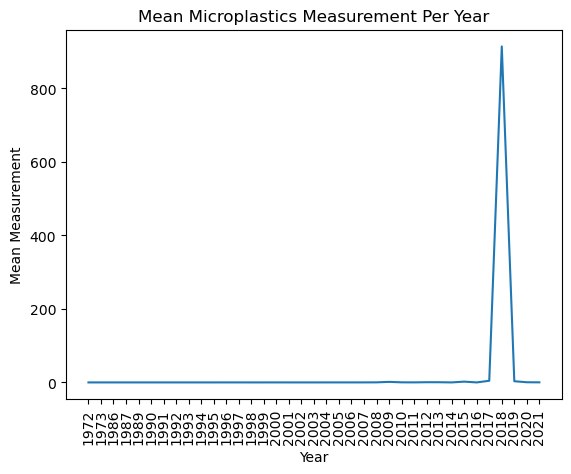

In [18]:
#display results for microplastics over time
year_ocean_df = clean_microplastics.groupby("Year")["Measurement"].mean()
year_ocean_df = year_ocean_df.reset_index()

# Create line plot
plt.plot(year_ocean_df['Year'], year_ocean_df['Measurement'])

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Mean Measurement')
plt.xticks(rotation="vertical")
plt.title('Mean Microplastics Measurement Per Year')

# Display plot
plt.show()

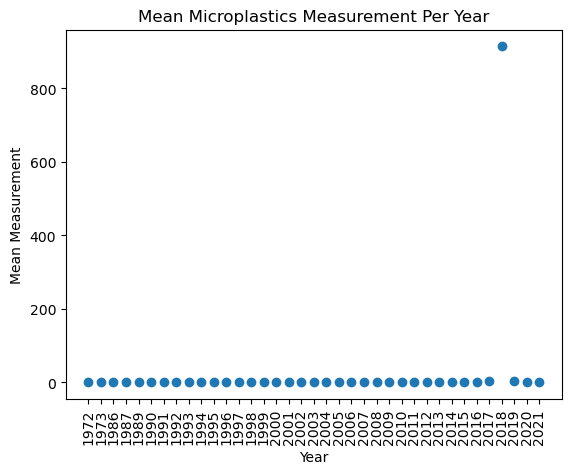

In [19]:
# Create line plot
plt.scatter(year_ocean_df['Year'], year_ocean_df['Measurement'])

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Mean Measurement')
plt.xticks(rotation="vertical")
plt.title('Mean Microplastics Measurement Per Year')

# Display plot
plt.show()